In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import cosine, correlation


In [13]:
# read data
r_cols = ['', 'userId', 'movieId', 'rating']
ratings = pd.read_csv('~/Downloads/smallRatingResult.csv', 
                      names=r_cols, 
                      usecols=r_cols, 
                      header=0, 
                      index_col=0,
                      low_memory=False, 
                      dtype={'userId':'int', 
                             'movieId':'int',
                             'rating':'float'})

ratings.groupby('movieId')
ratings

,userId,movieId,rating
,,,
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
5,1,1590,2.5
6,1,1591,1.5
7,1,2134,4.5
8,1,2478,4.0


In [26]:
ratings_df = pd.DataFrame(ratings.groupby(['movieId'])['rating'].mean())
ratings_df['numberOfRatings'] = ratings.groupby(['movieId'])['rating'].count()
ratings_df

,rating,numberOfRatings
movieId,,
1,4.269231,26
2,3.269231,13
3,3.100000,5
4,5.000000,1
5,3.000000,4
6,3.708333,12
7,3.500000,2
8,5.000000,1
9,3.666667,3


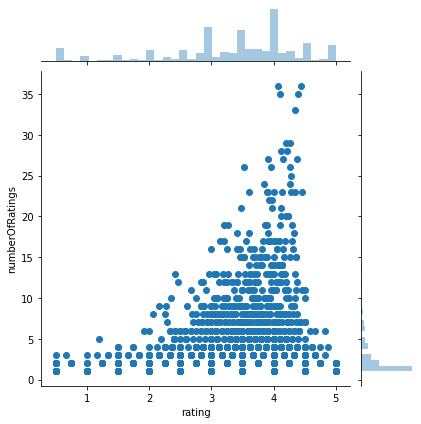

In [27]:
sns.jointplot(x='rating', y='numberOfRatings', data=ratings_df)

In [15]:
# read movie detail and join with ratings
# m_cols = ['id', 'title']
# movies = pd.read_csv('~/Downloads/movieDetail.csv', 
#                       usecols=m_cols, 
#                       header=0, 
#                       low_memory=False, 
#                      )
# ratings = pd.merge(ratings, movies, left_on='movieId', right_on='id')

# print(ratings)

In [16]:
movieStats = ratings.groupby('movieId').agg({'rating': [np.size, np.mean]})

movieStats

rating          
          size      mean
movieId                 
1         26.0  4.269231
2         13.0  3.269231
3          5.0  3.100000
4          1.0  5.000000
5          4.0  3.000000
6         12.0  3.708333
7          2.0  3.500000
8          1.0  5.000000
9          3.0  3.666667
10        10.0  3.700000
11         8.0  3.750000
12         2.0  3.000000
14         1.0  3.000000
15         1.0  3.000000
16         7.0  4.285714
17         9.0  4.111111
18         1.0  4.000000
19         9.0  2.166667
20         3.0  2.833333
21         7.0  3.785714
22         2.0  3.000000
23         3.0  3.666667
24         3.0  3.500000
25         8.0  4.187500
27         1.0  5.000000
29         5.0  4.200000
31         3.0  3.666667
32        23.0  3.913043
34        14.0  3.714286
36        11.0  3.818182
...        ...       ...
156387     1.0  3.500000
156726     1.0  2.000000
158783     1.0  4.500000
159093     1.0  1.500000
159817     1.0  3.000000
160718     2.0  4.500000
161582     1.0  3.500000
162594     1.0  3.000000
162606     1.0  2.500000
164179     2.0  4.250000
164909     1.0  4.500000
166024     1.0  4.500000
166528     1.0  2.000000
166534     1.0  2.000000
166635     1.0  2.500000
168250     1.0  3.000000
168252     1.0  3.000000
173291     1.0  2.500000
173941     1.0  1.000000
174053     2.0  4.750000
174055     3.0  4.333333
175303     1.0  4.500000
175569     1.0  4.000000
176371     2.0  4.000000
176423     1.0  3.500000
177593     1.0  4.000000
177615     1.0  3.500000
177765     1.0  5.000000
184797     1.0  3.500000
187595     1.0  3.500000

[3198 rows x 2 columns]

In [17]:
# create pivot table
userRatings = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')

userRatings

movieId,1,2,3,4,5,6,7,8,9,10,...,174055,175303,175569,176371,176423,177593,177615,177765,184797,187595
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,NaN,NaN,2.0,4.5,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,3.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# create correlation matrix using Pearson Relation
corrMatrix = userRatings.corr(method='pearson')

corrMatrix

movieId,1,2,3,4,5,6,7,8,9,10,...,174055,175303,175569,176371,176423,177593,177615,177765,184797,187595
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.363803,NaN,NaN,-1.0,-0.610170,NaN,NaN,NaN,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.363803,1.000000,NaN,NaN,NaN,0.481869,NaN,NaN,NaN,0.943880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,-0.500000,1.0,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.610170,0.481869,-0.5,NaN,NaN,1.000000,NaN,NaN,NaN,0.342997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
